<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-projects/blob/master/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [551]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import skew

np.random.seed(0)

In [552]:
df_train = pd.read_csv('train.csv')
train_data = df_train.copy()
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [553]:
df_test = pd.read_csv('test.csv')
test_data = df_test.copy()
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [554]:
train_data.shape

(1460, 81)

In [555]:
test_data.shape

(1459, 80)

In [556]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###Missing values

In [557]:
train_data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [558]:
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
train_missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
train_missing_data.head(30)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [559]:
test_data_na = (test_data.isnull().sum() / len(test_data)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)
test_missing_data = pd.DataFrame({'Missing Ratio' :test_data_na})
test_missing_data.head(40)

,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageCond,5.346127
GarageQual,5.346127
GarageFinish,5.346127


In [560]:
for col in train_data.columns:
  print(train_data[col].value_counts(), '\n')

1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64 

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64 

7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64 

Pave    1454
Grvl       6
Name: Street, dtype: int64 

Grvl    50
Pave    41
Name: Alley, dtype: int64 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int6

In [561]:
#PoolQC: NA means 'No pool'

train_data['PoolQC'] = train_data['PoolQC'].fillna('None')
test_data['PoolQC'] = test_data['PoolQC'].fillna('None')

In [562]:
#MiscFeature: NA means 'no misc feature'

train_data['MiscFeature'] = train_data['MiscFeature'].fillna('None')
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('None')

In [563]:
#Alley: NA means 'no alley access'

train_data['Alley'] = train_data['Alley'].fillna('None')
test_data['Alley'] = test_data['Alley'].fillna('None')

In [564]:
#Fence: NA means 'no fence'

train_data['Fence'] = train_data['Fence'].fillna('None')
test_data['Fence'] = test_data['Fence'].fillna('None')


In [565]:
#FireplaceQu: NA means 'no fireplace'

train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('None')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('None')


In [566]:
# LotFontage - Linear feet of street connected to property. We can fill in missing values by the median LotFrontage of the neighborhood.

train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test_data['LotFrontage'] = test_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [567]:
#GarageQual, GarageCond, GarageType, GarageFinish: NA means 'no garage'

for col in ['GarageQual', 'GarageCond', 'GarageType', 'GarageFinish']:
  train_data[col] = train_data[col].fillna('None')
  test_data[col] = test_data[col].fillna('None')

In [568]:
#GarageYrBlt, GarageArea, GarageCars : Na means 'no garage'

for col in ['GarageArea', 'GarageCars']:
  train_data[col] = train_data[col].fillna(0)
  test_data[col] = test_data[col].fillna(0)

train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(0)
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

In [569]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: NA means 'no basement'

for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
  train_data[col] = train_data[col].fillna(0)
  test_data[col] = test_data[col].fillna(0)

In [570]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : NA means 'no basement'

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
  train_data[col] = train_data[col].fillna('None')
  test_data[col] = test_data[col].fillna('None')

In [571]:
#MasVnrArea and MasVnrType: NA most likely means no masonry veneer for these houses

train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(0)

test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

In [572]:
#MSZoning (identifies the general zoning classification of the sale): NA fill in missing values with most frequent

train_data['MSZoning'] = train_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])

In [573]:
#Drop for: Utilities - all values are the same except one
train_data = train_data.drop(['Utilities'], axis=1)
test_data = test_data.drop(['Utilities'], axis=1)

In [574]:
#Exterior1st and Exterior2nd - fill in missing values with most frequent

train_data['Exterior1st'] = train_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])

train_data['Exterior2nd'] = train_data['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])


In [575]:
#Functional:  - fill in missing values with most frequent (means typical functionality)

train_data['Functional'] = train_data['Functional'].fillna(train_data['Functional'].mode()[0])
test_data['Functional'] = test_data['Functional'].fillna(test_data['Functional'].mode()[0])

In [576]:
#Electrical:  - fill in missing values with most frequent

train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

In [577]:
#KitchenQual:  - fill in missing values with most frequent

train_data['KitchenQual'] = train_data['KitchenQual'].fillna(train_data['KitchenQual'].mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])

In [578]:
#SaleType: - - fill in missing values with most frequent

train_data['SaleType'] = train_data['SaleType'].fillna(train_data['SaleType'].mode()[0])
test_data['SaleType'] = test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])

In [579]:
#Drop ID - unique values
train_data = train_data.drop(['Id'], axis=1)
test_data = test_data.drop(['Id'], axis=1)

In [580]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [581]:
train_data.isnull().sum().sum()

0

In [582]:
test_data.isnull().sum().sum()

0

###The most important features relative to target

In [583]:
corr = train_data.corr()

corr['SalePrice'].sort_values(ascending=False).iloc[:30]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.349876
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
GarageYrBlt     0.261366
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
Name: SalePrice, dtype: float64

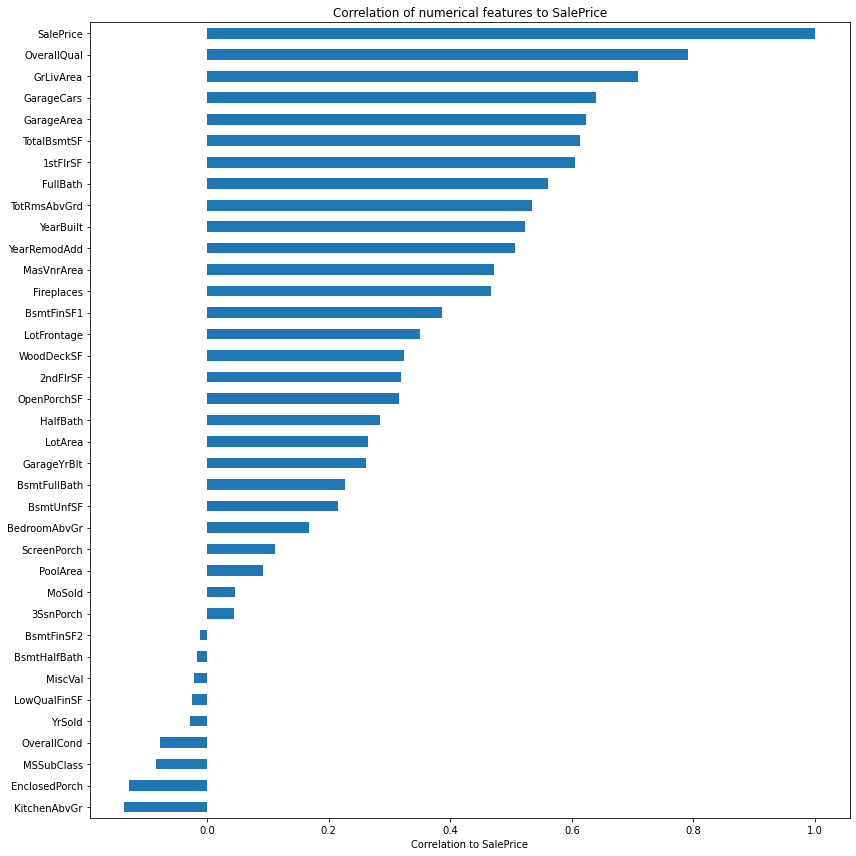

In [584]:
plt.figure(figsize=(12,12))
corr['SalePrice'].sort_values(ascending=True).plot(kind='barh')
plt.title('Correlation of numerical features to SalePrice')
plt.xlabel('Correlation to SalePrice')
plt.tight_layout()
plt.show()

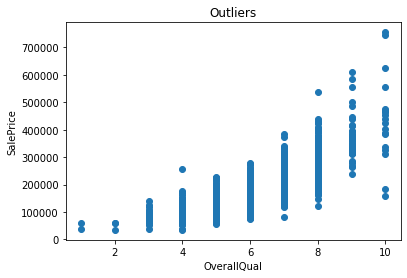

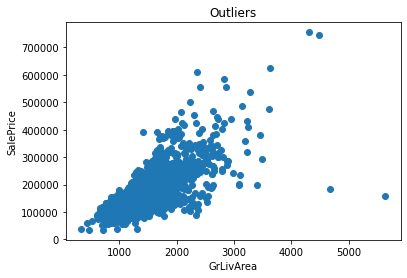

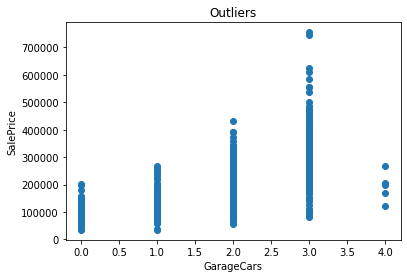

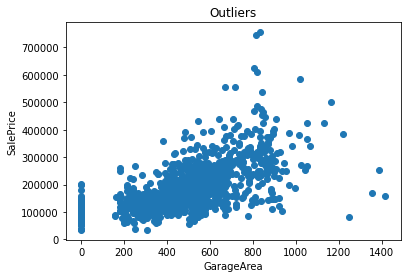

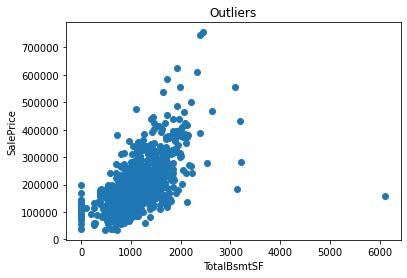

In [585]:
corr_feature = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
for feature in corr_feature:
  plt.scatter(x=train_data[feature], y=train_data['SalePrice'])
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title('Outliers')
  plt.show()

###Outliers

In [586]:
#GrLivingArea - drop 2 outliers (hight living area - low price)

train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index, axis=0)

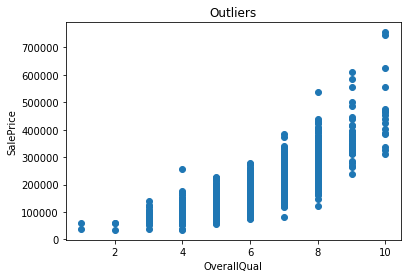

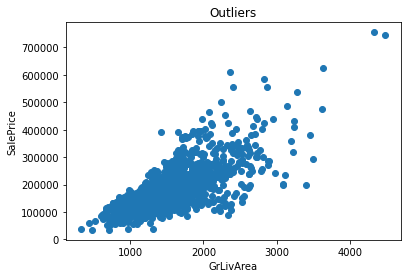

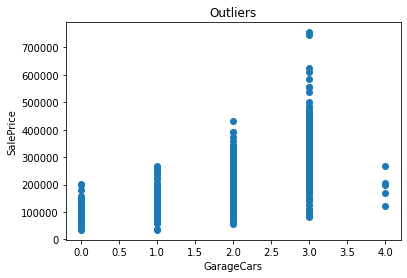

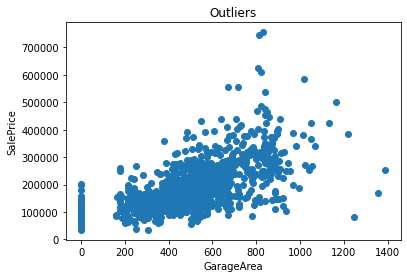

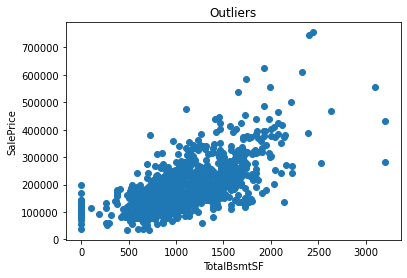

In [587]:
for feature in corr_feature:
  plt.scatter(x=train_data[feature], y=train_data['SalePrice'])
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title('Outliers')
  plt.show()

###Numerical features

In [588]:
all_data = pd.concat((train_data, test_data), ignore_index=True)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal,NaN
2913,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml,NaN
2914,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml,NaN
2915,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0

In [589]:
numerical_feature= [feature for feature in all_data.columns if all_data[feature].dtypes != 'O']

print(f'Number of numerical variables: {len(numerical_feature)}')

Number of numerical variables: 37


In [590]:
all_data[numerical_feature].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


#####Year features

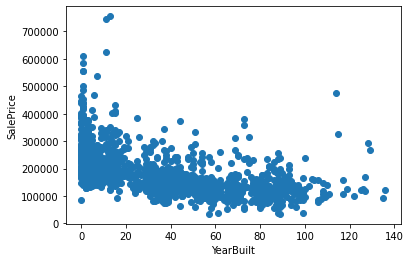

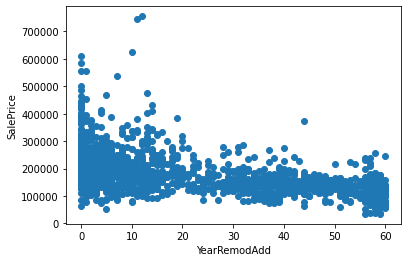

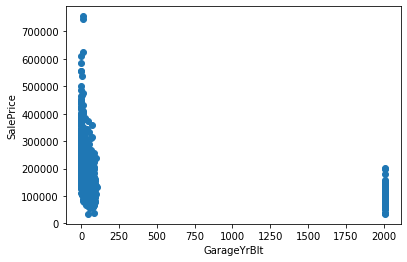

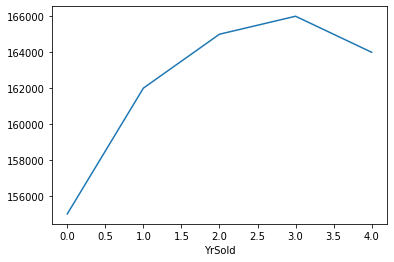

In [591]:
year_feature = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

for feature in year_feature:
  if feature != 'YrSold':
    all_data[feature] = all_data['YrSold'] - all_data[feature]
    plt.scatter(x=all_data[feature], y=all_data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
  else:
    all_data['YrSold'] = all_data['YrSold'].max() - all_data['YrSold']
    all_data.groupby('YrSold')['SalePrice'].median().plot()
  

#####Discrete features

In [592]:
numerical_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [593]:
discrete_feature = [feature for feature in numerical_feature if len(all_data[feature].unique())<40 and feature not in year_feature]

print(f'Number of discrete feature is {len(discrete_feature)}')

discrete_feature

Number of discrete feature is 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [594]:
discrete_feature = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd',  'Fireplaces','GarageCars', 'MoSold' ]

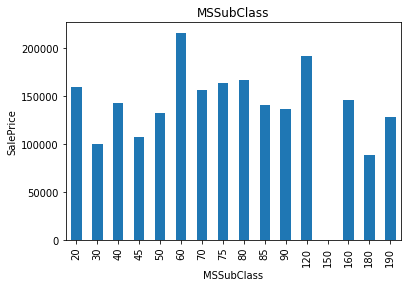

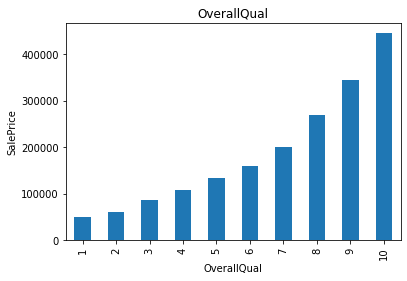

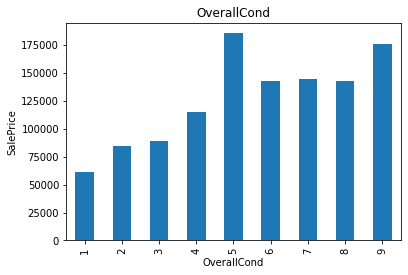

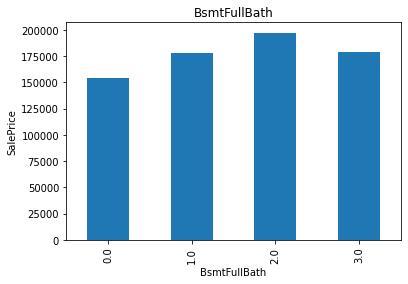

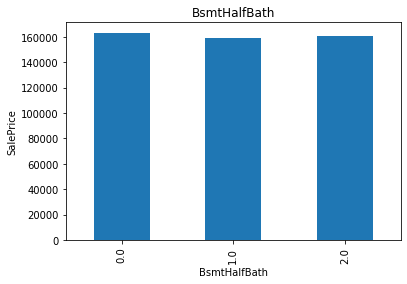

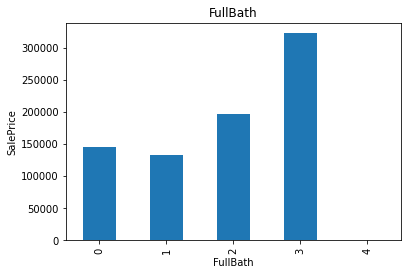

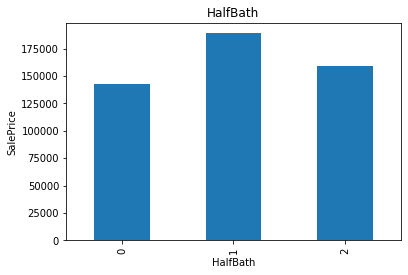

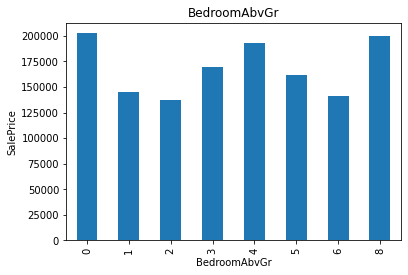

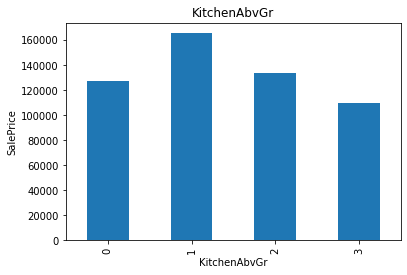

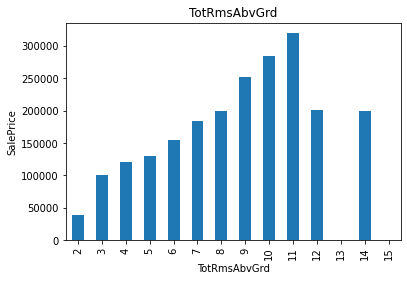

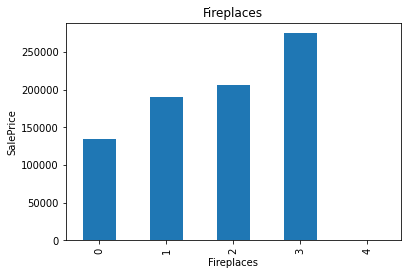

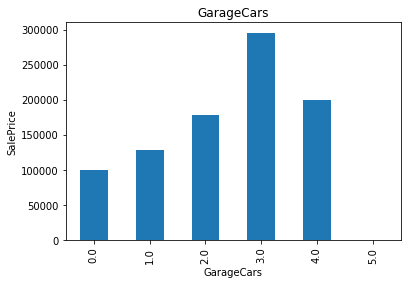

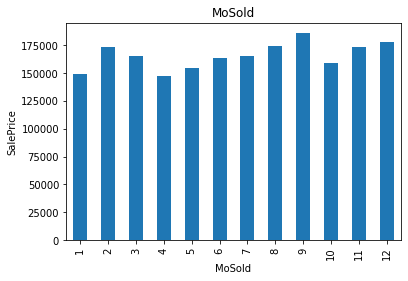

In [595]:
for feature in discrete_feature:
    all_data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [596]:
# map months to seasons: 0 == winter, 1 == spring etc.

seasons = {12 : 0, 1 : 0, 2 : 0, 
           3 : 1, 4 : 1, 5 : 1,
           6 : 2, 7 : 2, 8 : 2, 
           9 : 3, 10 : 3, 11 : 3}

all_data['Seasons'] = all_data['MoSold'].map(seasons)
all_data = all_data.drop('MoSold', axis=1)


In [597]:
#MSubClass, OverallQual, OverallCond and Seasons are actually categorical features

all_data['MSSubClass'] = all_data['MSSubClass'].astype('str')
all_data['OverallCond'] = all_data['OverallCond'].astype('str')
all_data['OverallQual'] = all_data['OverallQual'].astype('str')
all_data['Seasons'] = all_data['Seasons'].astype('str')

In [598]:
discrete_feature = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd',  'Fireplaces','GarageCars']

In [599]:
for feature in discrete_feature:
  all_data[feature] = all_data[feature].astype('int')

In [600]:
all_data[discrete_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BsmtFullBath  2917 non-null   int64
 1   BsmtHalfBath  2917 non-null   int64
 2   FullBath      2917 non-null   int64
 3   HalfBath      2917 non-null   int64
 4   BedroomAbvGr  2917 non-null   int64
 5   KitchenAbvGr  2917 non-null   int64
 6   TotRmsAbvGrd  2917 non-null   int64
 7   Fireplaces    2917 non-null   int64
 8   GarageCars    2917 non-null   int64
dtypes: int64(9)
memory usage: 205.2 KB


####Continuous features

In [601]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+year_feature+discrete_feature+['MSSubClass', 'OverallCond', 'OverallQual', 'MoSold']]
print(f'Number of continuous features is: {len(continuous_feature)}')

Number of continuous features is: 20


In [602]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

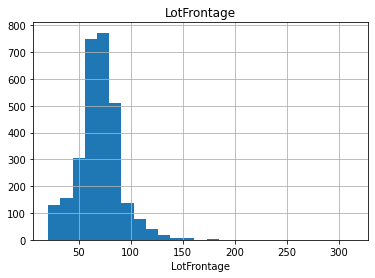

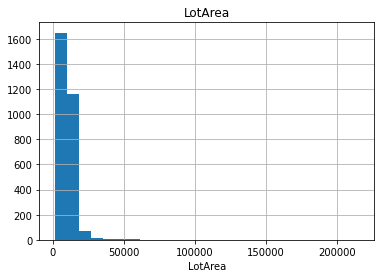

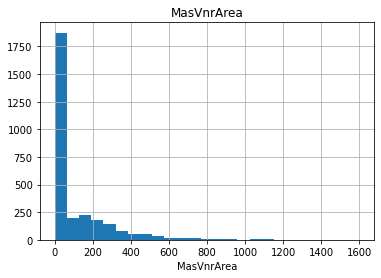

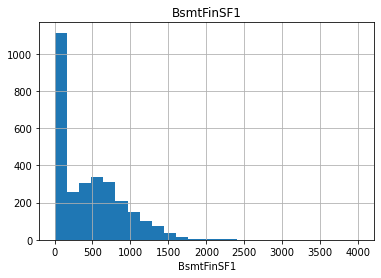

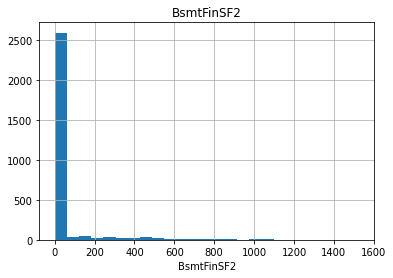

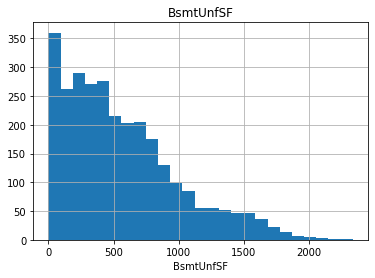

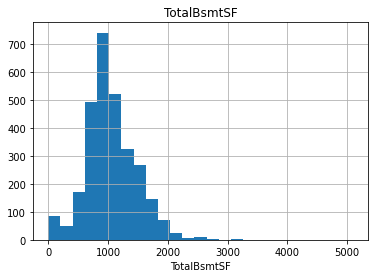

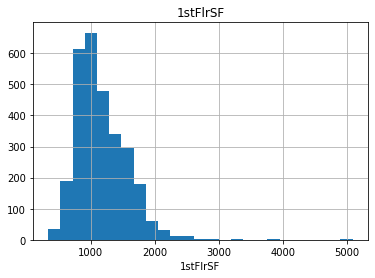

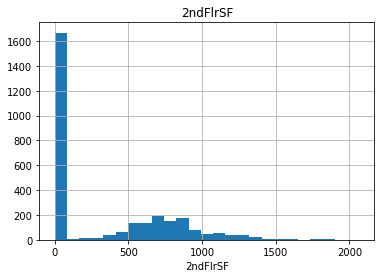

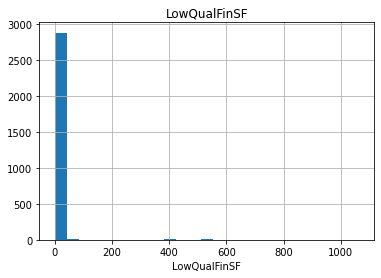

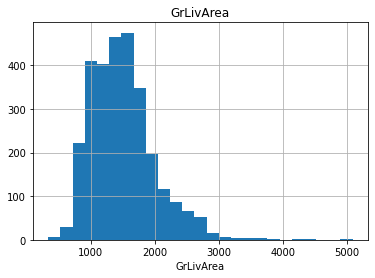

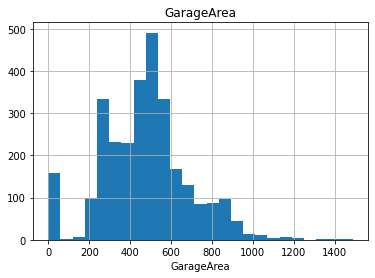

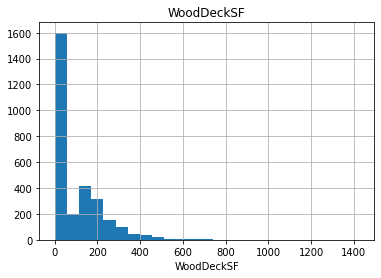

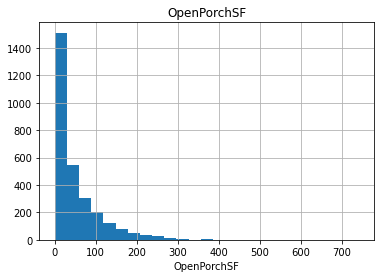

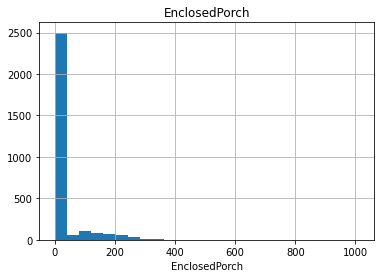

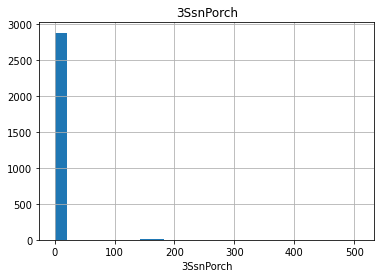

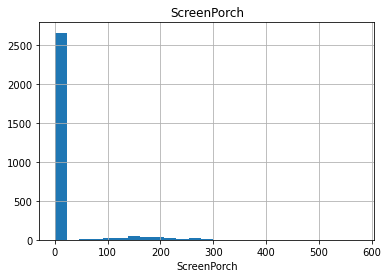

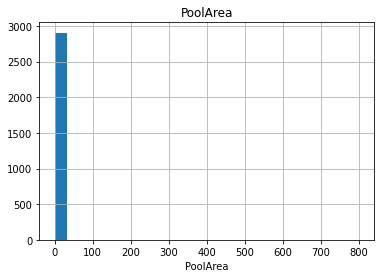

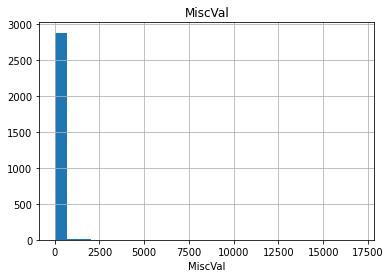

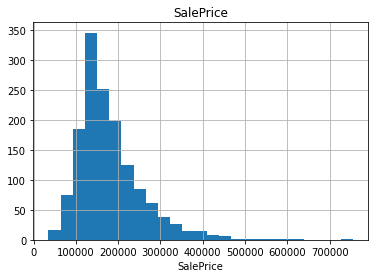

In [603]:
for feature in continuous_feature:
    all_data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [604]:
train_data[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


###Skewness

In [605]:
numerical_feat = [feature for feature in discrete_feature + continuous_feature + year_feature]

skewed_features = train_data[numerical_feat].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_features = skewed_features[skewed_features > 0.75]

all_data[skewed_features.index] = np.log1p(all_data[skewed_features.index])
all_data[skewed_features.index]

,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,MasVnrArea,OpenPorchSF,SalePrice,LotFrontage,WoodDeckSF,GrLivArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFinSF1
0,0.000000,0.0,9.042040,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,5.283204,4.127134,12.247699,4.189655,0.000000,7.444833,5.017280,6.753438,6.751101,6.561031
1,0.000000,0.0,9.169623,0.0,0.0,0.693147,0.0,0.0,0.693147,0.000000,0.000000,0.000000,12.109016,4.394449,5.700444,7.141245,5.652489,7.141245,0.000000,6.886532
2,0.000000,0.0,9.328212,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,5.093750,3.761200,12.317171,4.234107,0.000000,7.488294,6.075346,6.825460,6.765039,6.188264
3,0.000000,0.0,9.164401,0.0,0.0,0.693147,0.0,0.0,0.000000,5.609472,0.000000,3.583519,11.849405,4.110874,0.000000,7.448916,6.293419,6.869014,6.629363,5.379897
4,0.000000,0.0,9.565284,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,5.860786,4.442651,12.429220,4.442651,5.262690,7.695758,6.196444,7.044033,6.960348,6.486161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,0.000000,0.0,7.568896,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,0.000000,0.000000,NaN,3.091042,0.000000,6.996681,6.304449,6.304449,6.304449,0.000000
2913,0.000000,0.0,7.546974,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,0.000000,3.218876,NaN,3.091042,0.000000,6.996681,5.686975,6.304449,6.304449,5.533389
2914,0.000000,0.0,9.903538,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,0.000000,0.000000,NaN,5.081404,6.163315,7.110696,0.000000,7.110696,0.000000,7.110696
2915,6.552508,0.0,9.253591,0.0,0.0,0.693147,0.0,0.0,0.693147,0.000000,0.000000,3.496508,NaN,4.143135,4.394449,6.878326,6.356108,6.878326,0.000000,5.823046


####Categorical features

In [606]:
categorical_feature = [feature for feature in all_data.columns if all_data[feature].dtype=='O']
all_data[categorical_feature].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Seasons
0,60,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,0
1,20,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,1
2,60,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,3
3,70,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml,0
4,60,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,0


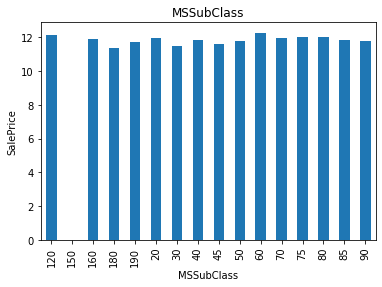

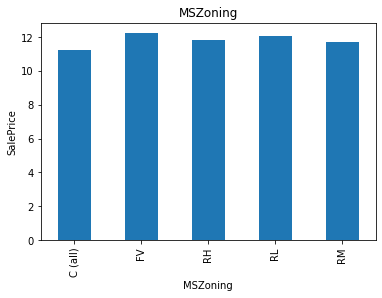

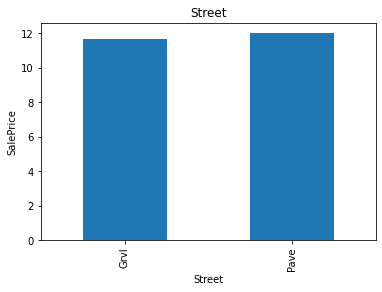

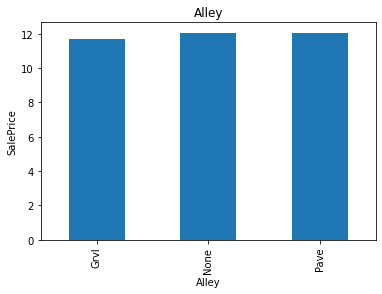

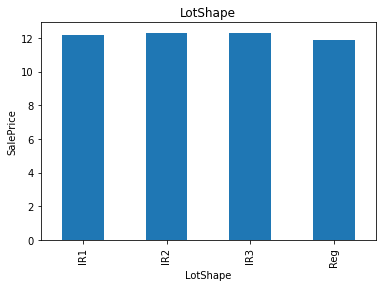

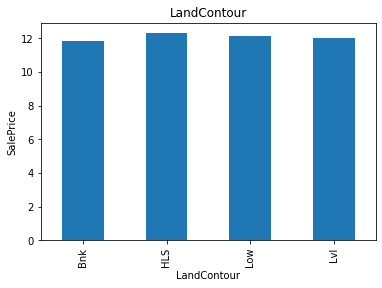

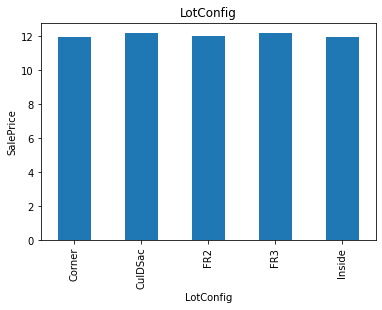

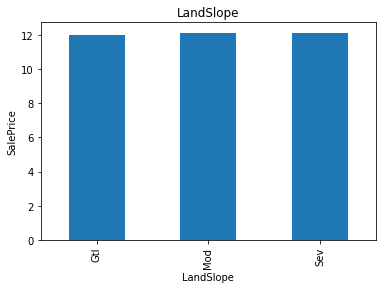

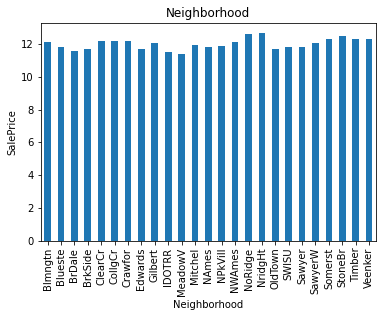

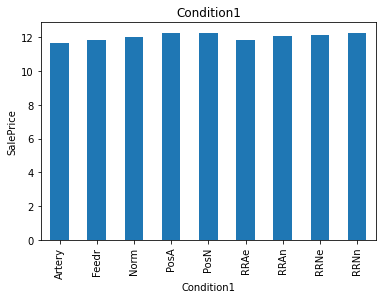

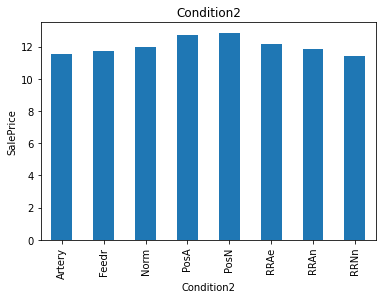

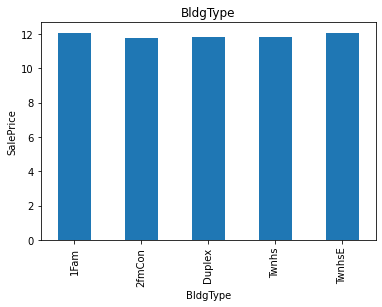

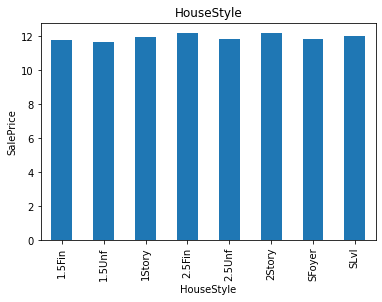

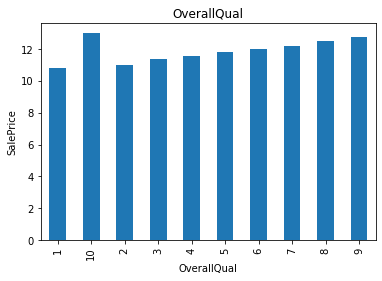

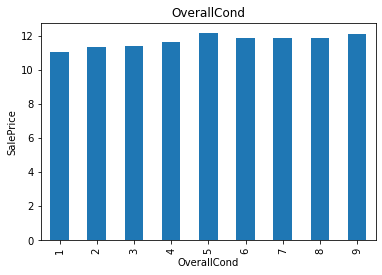

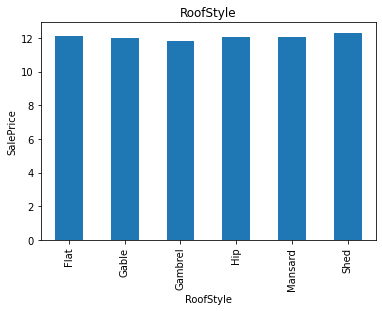

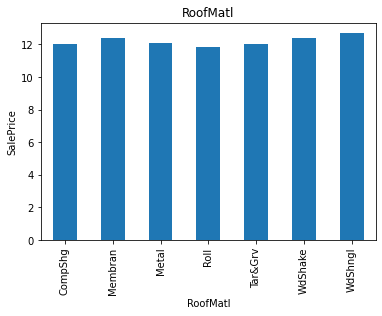

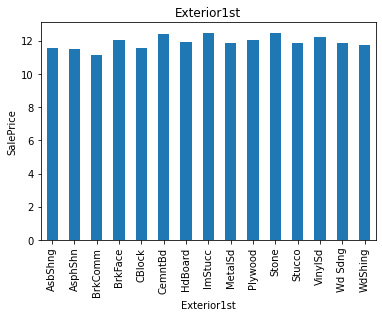

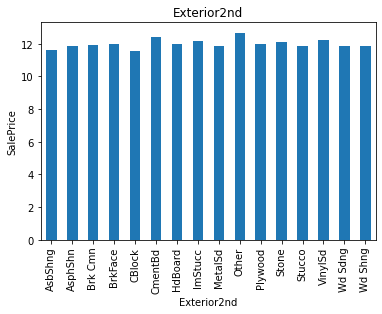

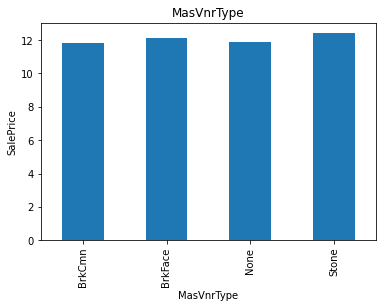

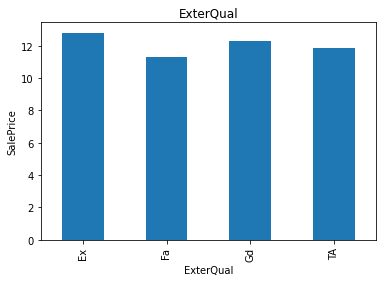

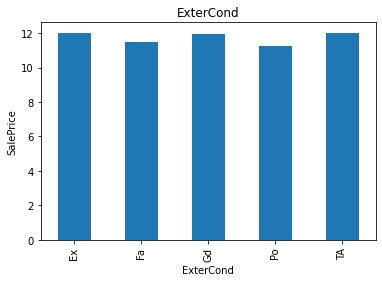

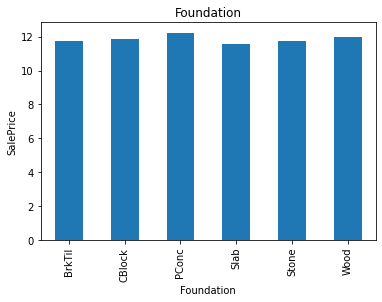

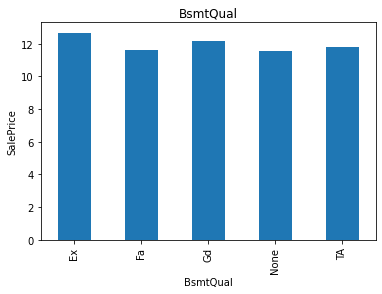

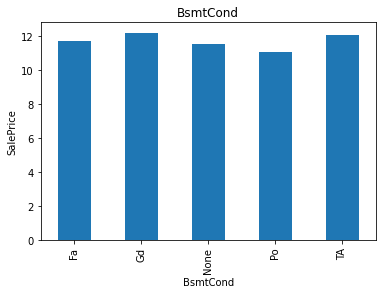

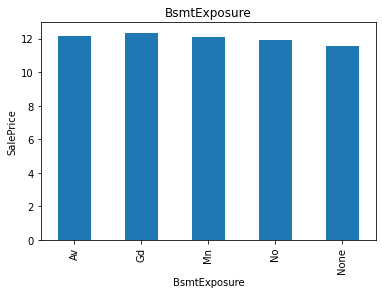

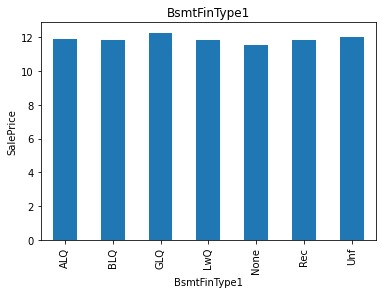

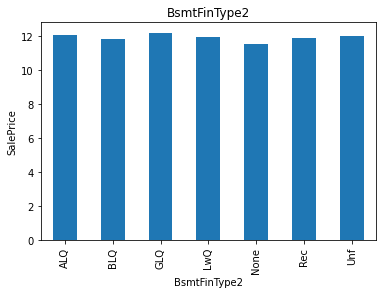

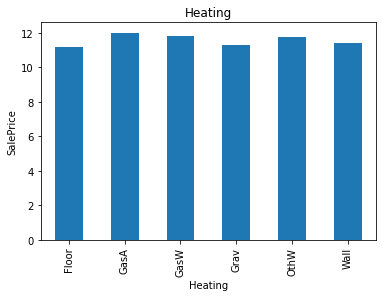

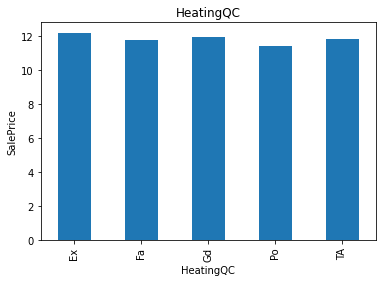

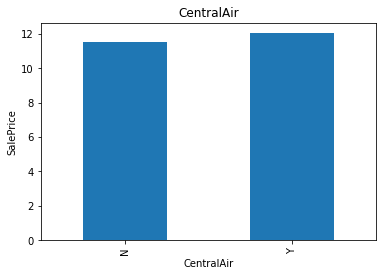

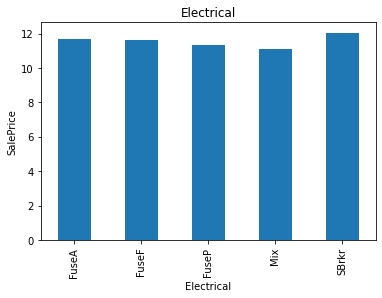

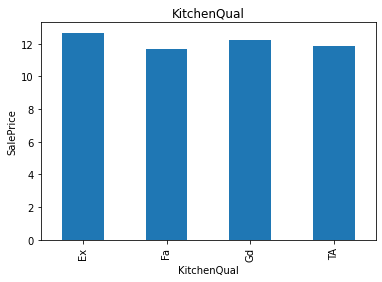

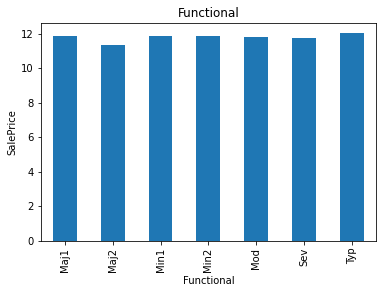

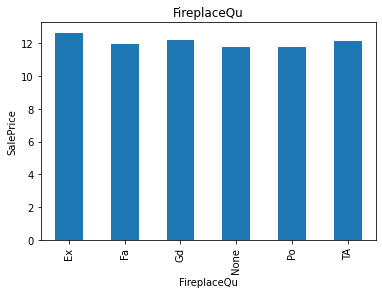

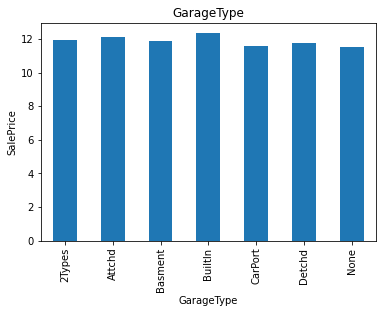

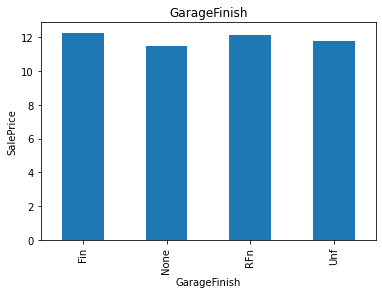

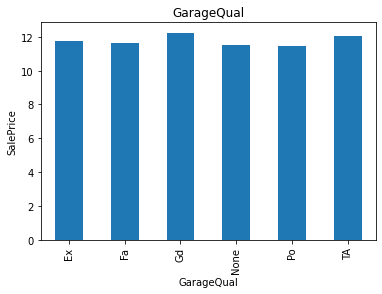

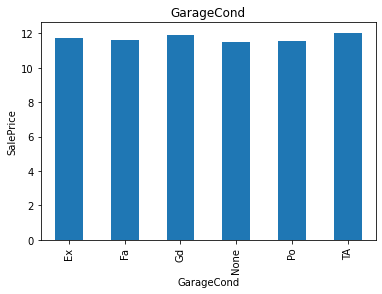

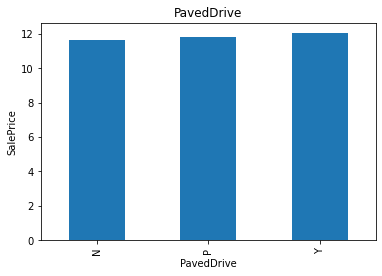

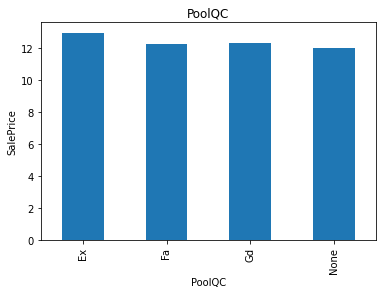

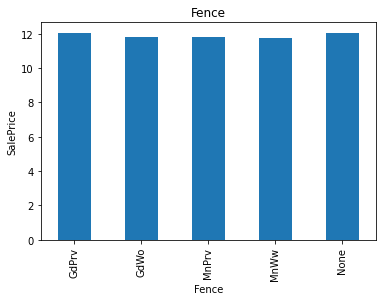

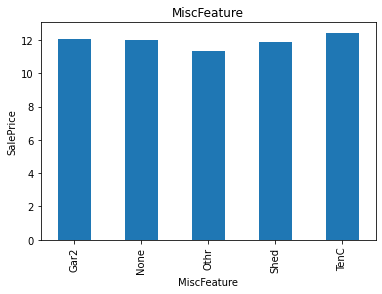

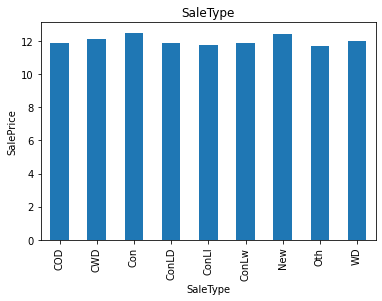

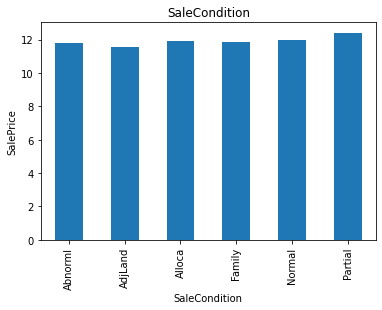

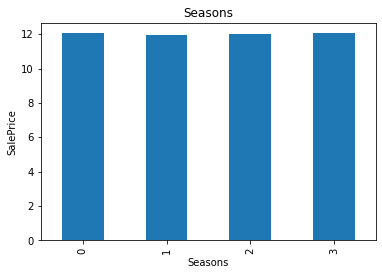

In [607]:
for feature in categorical_feature:
    all_data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

###Feature Scaling

In [608]:
train_data = all_data.iloc[:train_data.shape[0]]
train_data.shape

(1458, 79)

In [609]:
test_data = all_data.iloc[train_data.shape[0]:]
test_data = test_data.drop(['SalePrice'], axis=1)
test_data.shape

(1459, 78)

In [610]:
feature_scale = [feature for feature in continuous_feature + discrete_feature + year_feature if feature not in ['SalePrice']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_data[feature_scale])
train_data[feature_scale] = scaler.transform(train_data[feature_scale])
test_data[feature_scale] = scaler.transform(test_data[feature_scale])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Get dummies for caterogical features

In [611]:
all_data = pd.concat((train_data, test_data), ignore_index=True)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,Seasons
0,60,RL,-0.079885,-0.129624,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,-1.045249,-0.871676,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.207635,Gd,TA,PConc,Gd,TA,No,GLQ,0.781657,Unf,-0.355617,-0.339727,-0.473766,GasA,Ex,Y,SBrkr,-0.806494,1.182829,-0.133696,0.539563,1.113886,-0.243100,0.793546,1.229699,0.163894,-0.207756,Gd,0.921812,Typ,-0.952231,None,Attchd,-0.295846,RFn,0.313159,0.357973,TA,TA,Y,-0.945331,0.848459,-0.404567,-0.128611,-0.292987,-0.064269,None,None,None,-0.190617,-0.138375,WD,Normal,12.247699,0
1,20,RL,0.558193,0.118819,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,-0.185182,0.388660,Gable,CompShg,MetalSd,MetalSd,None,-0.805570,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.890540,Unf,-0.355617,0.002819,0.504925,GasA,Ex,Y,SBrkr,0.428226,-0.868747,-0.133696,-0.380320,-0.819502,4.018527,0.793546,-0.760202,0.163894,-0.207756,TA,-0.316329,Typ,0.605965,TA,Attchd,-0.238557,RFn,0.313159,-0.056795,TA,TA,Y,1.251286,-1.071920,-0.404567,-0.128611,-0.292987,-0.064269,None,None,None,-0.190617,0.614427,WD,Normal,12.109016,1
2,60,RL,0.058613,0.427643,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,-0.979090,-0.823201,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.135442,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.656962,Unf,-0.355617,0.230852,-0.319490,GasA,Ex,Y,SBrkr,-0.577186,1.187064,-0.133696,0.671249,1.113886,-0.243100,0.793546,1.229699,0.163894,-0.207756,Gd,-0.316329,Typ,0.605965,TA,Attchd,-0.291439,RFn,0.313159,0.640770,TA,TA,Y,-0.945331,0.678188,-0.404567,-0.128611,-0.292987,-0.064269,None,None,None,-0.190617,-0.138375,WD,Normal,12.317171,3
3,70,RL,-0.325343,0.108651,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1.799589,0.631032,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.805570,TA,TA,BrkTil,TA,Gd,No,ALQ,0.386556,Unf,-0.355617,0.348451,-0.714823,GasA,Gd,Y,SBrkr,-0.438516,1.145834,-0.133696,0.551934,1.113886,-0.243100,-1.025620,-0.760202,0.163894,-0.207756,Gd,0.302742,Typ,0.605965,Gd,Detchd,-0.289236,Unf,1.652119,0.801022,TA,TA,Y,-0.945331,0.595511,2.842190,-0.128611,-0.292987,-0.064269,None,None,None,-0.190617,1.367230,WD,Abnorml,11.849405,0
4,60,RL,0.708377,0.889295,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,-0.946011,-0.726252,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.427727,Gd,TA,PConc,Gd,TA,Av,GLQ,0.756612,Unf,-0.355617,0.296156,0.222888,GasA,Ex,Y,SBrkr,0.118717,1.246416,-0.133696,1.299874,1.113886,-0.243100,0.793546,1.229699,1.389320,-0.207756,Gd,1.540882,Typ,0.605965,TA,Attchd,-0.289236,RFn,1.652119,1.715398,TA,TA,Y,1.082602,0.995271,-0.404567,-0.128611,-0.292987,-0.064269,None,None,None,-0.190617,-0.138375,WD,Normal,12.429220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,RM,-3.502836,-2.998295,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,-0.019784,0.631032,Gable,CompShg,CemntBd,CmentBd,None,-0.805570,TA,TA,CBlock,TA,TA,No,Unf,-1.413075,Unf,-0.355617,0.354399

In [612]:
all_data  = pd.get_dummies(all_data)
all_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,...,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Seasons_0,Seasons_1,Seasons_2,Seasons_3
0,-0.079885,-0.129624,-1.045249,-0.871676,1.207635,0.781657,-0.355617,-0.339727,-0.473766,-0.806494,1.182829,-0.133696,0.539563,1.113886,-0.243100,0.793546,1.229699,0.163894,-0.207756,0.921812,-0.952231,-0.295846,0.313159,0.357973,-0.945331,0.848459,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,-0.138375,12.247699,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,0.558193,0.118819,-0.185182,0.388660,-0.805570,0.890540,-0.355617,0.002819,0.504925,0.428226,-0.868747,-0.133696,-0.380320,-0.819502,4.018527,0.793546,-0.760202,0.163894,-0.207756,-0.316329,0.605965,-0.238557,0.313159,-0.056795,1.251286,-1.071920,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,0.614427,12.109016,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0.058613,0.427643,-0.979090,-0.823201,1.135442,0.656962,-0.355617,0.230852,-0.319490,-0.577186,1.187064,-0.133696,0.671249,1.113886,-0.243100,0.793546,1.229699,0.163894,-0.207756,-0.316329,0.605965,-0.291439,0.313159,0.640770,-0.945331,0.678188,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,-0.138375,12.317171,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,-0.325343,0.108651,1.799589,0.631032,-0.805570,0.386556,-0.355617,0.348451,-0.714823,-0.438516,1.145834,-0.133696,0.551934,1.113886,-0.243100,-1.025620,-0.760202,0.163894,-0.207756,0.302742,0.605965,-0.289236,1.652119,0.801022,-0.945331,0.595511,2.842190,-0.128611,-0.292987,-0.064269,-0.190617,1.367230,11.849405,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,0.708377,0.889295,-0.946011,-0.726252,1.427727,0.756612,-0.355617,0.296156,0.222888,0.118717,1.246416,-0.133696,1.299874,1.113886,-0.243100,0.793546,1.229699,1.389320,-0.207756,1.540882,0.605965,-0.289236,1.652119,1.715398,1.082602,0.995271,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,-0.138375,12.429220,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


###Split into train data and test data

In [613]:
train_data = all_data.iloc[:train_data.shape[0]]
train_data.shape

(1458, 335)

In [614]:
train_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,...,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Seasons_0,Seasons_1,Seasons_2,Seasons_3
0,-0.079885,-0.129624,-1.045249,-0.871676,1.207635,0.781657,-0.355617,-0.339727,-0.473766,-0.806494,1.182829,-0.133696,0.539563,1.113886,-0.243100,0.793546,1.229699,0.163894,-0.207756,0.921812,-0.952231,-0.295846,0.313159,0.357973,-0.945331,0.848459,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,-0.138375,12.247699,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,0.558193,0.118819,-0.185182,0.388660,-0.805570,0.890540,-0.355617,0.002819,0.504925,0.428226,-0.868747,-0.133696,-0.380320,-0.819502,4.018527,0.793546,-0.760202,0.163894,-0.207756,-0.316329,0.605965,-0.238557,0.313159,-0.056795,1.251286,-1.071920,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,0.614427,12.109016,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0.058613,0.427643,-0.979090,-0.823201,1.135442,0.656962,-0.355617,0.230852,-0.319490,-0.577186,1.187064,-0.133696,0.671249,1.113886,-0.243100,0.793546,1.229699,0.163894,-0.207756,-0.316329,0.605965,-0.291439,0.313159,0.640770,-0.945331,0.678188,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,-0.138375,12.317171,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,-0.325343,0.108651,1.799589,0.631032,-0.805570,0.386556,-0.355617,0.348451,-0.714823,-0.438516,1.145834,-0.133696,0.551934,1.113886,-0.243100,-1.025620,-0.760202,0.163894,-0.207756,0.302742,0.605965,-0.289236,1.652119,0.801022,-0.945331,0.595511,2.842190,-0.128611,-0.292987,-0.064269,-0.190617,1.367230,11.849405,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
4,0.708377,0.889295,-0.946011,-0.726252,1.427727,0.756612,-0.355617,0.296156,0.222888,0.118717,1.246416,-0.133696,1.299874,1.113886,-0.243100,0.793546,1.229699,1.389320,-0.207756,1.540882,0.605965,-0.289236,1.652119,1.715398,1.082602,0.995271,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,-0.138375,12.429220,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [615]:
test_data = all_data.iloc[train_data.shape[0]:]
test_data = test_data.drop(['SalePrice'], axis=1)
test_data.shape

(1459, 334)

In [616]:
test_data.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,...,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Seasons_0,Seasons_1,Seasons_2,Seasons_3
1458,0.558193,0.490987,0.410249,1.261200,-0.805570,0.644364,2.341044,-0.024344,-0.411091,-0.661253,-0.868747,-0.133696,-1.417165,-0.819502,-0.2431,-1.025620,-0.760202,-1.061532,-0.207756,-0.935399,-0.952231,-0.198896,-1.025802,1.215790,0.961631,-1.071920,-0.404567,-0.128611,3.123810,-0.064269,-0.190617,-1.64398,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1459,0.596423,0.890250,0.509488,1.406624,0.982104,0.871199,-0.355617,0.194973,0.666433,0.592797,-0.868747,-0.133696,-0.223700,-0.819502,-0.2431,-1.025620,1.229699,0.163894,-0.207756,-0.316329,-0.952231,-0.192285,-1.025802,-0.754361,1.357605,0.608260,-0.404567,-0.128611,-0.292987,-0.064269,7.501339,-1.64398,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1460,0.318406,0.829676,-0.780613,-0.532355,-0.805570,0.819634,-0.355617,-0.388275,-0.300205,-0.549650,1.122912,-0.133696,0.392612,-0.819502,-0.2431,0.793546,1.229699,0.163894,-0.207756,-0.316329,0.605965,-0.278219,0.313159,0.046897,1.120597,0.582403,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,-1.64398,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1461,0.480297,0.194016,-0.813692,-0.532355,0.354568,0.728432,-0.355617,0.073644,-0.305026,-0.556512,1.112789,-0.133696,0.345779,-0.819502,-0.2431,0.793546,1.229699,0.163894,-0.207756,0.302742,0.605965,-0.280422,0.313159,-0.009663,1.323898,0.608260,-0.404567,-0.128611,-0.292987,-0.064269,-0.190617,-1.64398,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1462,-1.343195,-1.149329,-0.615215,-0.241508,-0.805570,0.452137,-0.355617,0.689362,0.548315,0.473281,-0.868747,-0.133696,-0.337441,-0.819502,-0.2431,0.793546,-0.760202,-1.061532,-0.207756,-0.935399,-0.952231,-0.267201,0.313159,0.160016,-0.945331,0.984191,-0.404567,-0.128611,3.252724,-0.064269,-0.190617,-1.64398,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


###Target

In [617]:
target = train_data.pop('SalePrice')
target.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

###Modeling part

Linear Regression

In [618]:
lr = LinearRegression()

lr.fit(train_data, target)

y_pred = lr.predict(train_data)

df = pd.DataFrame(data=np.c_[target, y_pred], columns=['y_true', 'y_pred'])
df['error'] = np.abs(df['y_true'] - df['y_pred'])
df.head()

,y_true,y_pred,error
0,12.247699,12.226746,0.020954
1,12.109016,12.161530,0.052513
2,12.317171,12.288635,0.028536
3,11.849405,12.016998,0.167593
4,12.429220,12.579071,0.149851


In [619]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(target, y_pred))

0.0876289424300953

Polynomial linear regression

In [620]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(train_data)

lr_poly = LinearRegression()
lr_poly.fit(X_poly, target)

y_pred = lr_poly.predict(X_poly)
np.sqrt(mean_squared_error(target, y_pred))

0.0010386861621262883

In [621]:
from sklearn.model_selection import cross_val_score

rmse = np.sqrt(-cross_val_score(lr_poly, X_poly, target, scoring='neg_mean_squared_error', cv = 5))

print(f'Linear regression score: {rmse.mean():.4f} (+/- {rmse.std():.4f})')

Linear regression score: 2307277.3191 (+/- 3341433.9387)


Ridge Regression

In [622]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(train_data, target)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-0.013212206828934179


In [623]:
ridge = Ridge(alpha=5)
ridge.fit(train_data, target)

rmse = np.sqrt(-cross_val_score(ridge, train_data, target, scoring='neg_mean_squared_error', cv = 5))

print(f'Ridge regression score: {rmse.mean():.4f} (+/- {rmse.std():.4f})')

Ridge regression score: 0.1148 (+/- 0.0058)


Lasso Regression

In [624]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(train_data, target)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.31580617614329, tolerance: 0.018911334381783326

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.118346777745064, tolerance: 0.017996952084854276

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8702228902629514, tolerance: 0.01837208344628372

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.292047315643307, tolerance: 0.0

{'alpha': 0.001}
-0.013162402271470846


In [625]:
lasso = Lasso(alpha=0.001)

rmse = np.sqrt(-cross_val_score(lasso, train_data, target, scoring='neg_mean_squared_error', cv = 5))

print(f'Lasso regression score: {rmse.mean():.4f} (+/- {rmse.std():.4f})')

Lasso regression score: 0.1146 (+/- 0.0053)


Elastic net

In [626]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(train_data, target)
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.315806176240187, tolerance: 0.018911334381783326

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1183467778142555, tolerance: 0.017996952084854276

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8702228903445586, tolerance: 0.01837208344628372

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.29204731572073, tolerance: 0.

{'alpha': 0.001}
-0.01265601401094631


In [627]:
elastic = ElasticNet(alpha=0.001)

rmse = np.sqrt(-cross_val_score(elastic, train_data, target, scoring='neg_mean_squared_error', cv = 5))

print(f'Lasso regression score: {rmse.mean():.4f} (+/- {rmse.std():.4f})')

Lasso regression score: 0.1123 (+/- 0.0058)


###Import to CSV

In [628]:
lasso.fit(train_data, target)

preds = lasso.predict(test_data)
preds = np.expm1(preds)
solution = pd.DataFrame({'id':df_test.Id, 'SalePrice': preds})
solution.to_csv('results.csv', index = False)

